# Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. data

In [3]:
df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

display(df.head())

,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


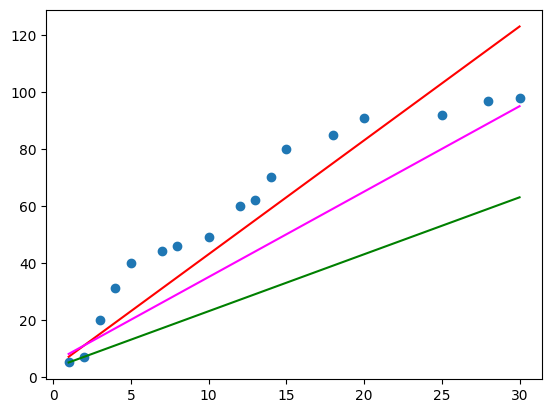

In [8]:
plt.scatter(df["공부시간(x)"], df["시험점수(t)"])
plt.plot(df["공부시간(x)"], df["공부시간(x)"] * 4 + 3, color='r')
plt.plot(df["공부시간(x)"], df["공부시간(x)"] * 2 + 3, color='g')
plt.plot(df["공부시간(x)"], df["공부시간(x)"] * 3 + 5, color='magenta')
plt.show()

### 2. loss
- 오차를 하나의 숫자로 계산
1. error를 더한다 -> 부호때문에 이상적인 loss를 찾기 힘듦

2. error의 절댓값을 더한다 -> loss를 구할 수 있는 방법 중 하나

3. MSE(Mean Squared Error) -> 오차가 클수록 패널티를 줌 ★

### 3. 구현

In [11]:
# Training Data Set
x_data = np.array([1, 2, 3, 4, 5]).reshape(5, 1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5, 1)

# model => y = Wx + b
# rand() => 0과 1 사이의 난수를 균등분포에서 발생
W = np.random.rand(1, 1)
b = np.random.rand(1)  # broadcasting에 의해 shape 맞춰짐

# loss function
def loss_func(input_data):
    
    input_W = input_data[0]
    input_b = input_data[1]
    
    # Y = XW + b
    y = np.dot(x_data, input_W) + input_b
    
    # MSE
    return np.mean(np.power((t_data - y), 2))

# derivative function
def numerical_derivative(f, x):

    # f는 미분하려는 다변수 함수
    # x는 모든 변수를 포함하는 ndarray [1.0, 2.0]
    # 리턴되는 결과는 [8.0, 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  # [0.0, 0.0]

    it = np.nditer(x, flags=['multi_index'])  # 변수별 편미분을 해야하므로 iterator

    while not it.finished:

        idx = it.multi_index  # 현재 index 추출 => tuple 형태로 리턴

        tmp = x[idx]  # 현재 index의 값 일시적으로 저장
                      # 이 값을 변경해서 중앙차분 값을 계산
                      # 편미분을 해야하므로 다음 변수 편미분할 때 원래 값으로 복원해야함
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)  # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# 학습이 다 종료되면(모델이 만들어지면) 예측 작업 함수 정의
def predict(x):
    
    return np.dot(x,W) + b

# learning rate 정의
learning_rate = 1e-4

# 학습을 진행
for step in range(300000):  # epochs
    
    # 현재 W는 2차원, b는 1차원
    # loss 함수 안으로 들어갈 때는 1차원 안에 두 값이 순서대로 있어야 함
    input_param = np.concatenate((W.ravel(), b.ravel()))
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(-1, 1)
    b = b - derivative_result[1]
    
    # 확인 작업
    if step % 30000 == 0:
        print(f'W: {W}, b: {b}, loss: {loss_func(input_param)}')

W: [[0.30640559]], b: [0.90987325], loss: 32.62895888906699
W: [[1.96464497]], b: [1.12764288], loss: 0.0029657579700924502
W: [[1.98717835]], b: [1.04629022], loss: 0.00039005055642174697
W: [[1.99535018]], b: [1.01678734], loss: 5.1298669041459606e-05
W: [[1.99831372]], b: [1.006088], loss: 6.7466983500164065e-06
W: [[1.99938846]], b: [1.00220784], loss: 8.873122729347409e-07
W: [[1.99977822]], b: [1.00080068], loss: 1.1669753542600245e-07
W: [[1.99991957]], b: [1.00029037], loss: 1.5347826453914776e-08
W: [[1.99997083]], b: [1.0001053], loss: 2.0185154381185667e-09
W: [[1.99998942]], b: [1.00003819], loss: 2.6547111336303926e-10


In [13]:
predict_result = predict(np.array([7]).reshape(-1, 1))
print(predict_result)

[[14.999987]]
